# Wikipedia web network
This notebook creates an adjacency matrix from a root Wikipedia page. It then find the PageRank of the produced web network. 

Created by Tim Chartier

### Create the network

In [1]:
import sys
!{sys.executable} -m pip install numpy matplotlib beautifulsoup4 lxml bs4 html5lib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import wikipediaNetwork as wiki

sizeOfNetwork = 1000 # How many Wikipedia web pages do you want in the network? 
A, wikiPages = wiki.wikipediaNetwork('https://en.wikipedia.org/wiki/List_of_common_misconceptions',sizeOfNetwork)

### Plot the network

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


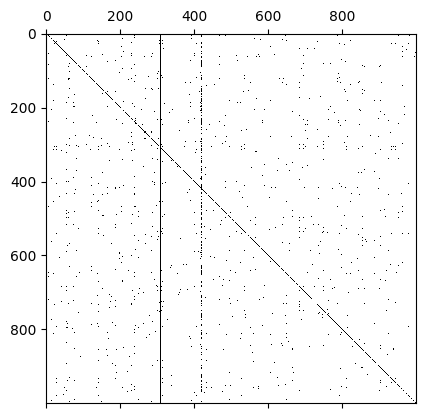

In [8]:
import matplotlib.pylab as plt
message = plt.spy(A)
print(A)

### Compute PageRank on network

In [4]:
# This function finds the PageRank of a networ passed as an adjacency matrix. 
# Created by Tim Chartier. 

def pagerank(A,TOL = 10^-3):

    import numpy as np
    
    # Remove loops (links to one's own webpage)
    A = A - np.diag(np.diag(A))
    
    # Construct Google matrix 
    alpha = 0.85
    rowSum = np.sum(A,1) # Compute the row sums
    sizeOfNetwork = len(A)
    G = np.zeros((sizeOfNetwork,sizeOfNetwork))
    for i in range(sizeOfNetwork):
        if (rowSum[i] == 0): # dangling node
            G[i,:] = np.ones((1,sizeOfNetwork))/sizeOfNetwork
        else:
            G[i,:] = alpha*A[i,:]/rowSum[i] + (1-alpha)/sizeOfNetwork

    # Compute PageRank vector
    numberOfLoops = 100
    v0 = np.ones(sizeOfNetwork)/sizeOfNetwork  # initial state
    vNew = v0
    for i in range(numberOfLoops):
        vOld = vNew
        vNew = vOld@G     
        if (np.amax(vNew - vOld) < TOL):
            break

    return vNew

In [5]:
import numpy as np
pageRankVector = pagerank(A)

### Print the results

In [9]:
numberOfPagesToPrint = 10

numberOfPagesToPrint = np.amin([len(pageRankVector),numberOfPagesToPrint])

iSort = np.argsort(-pageRankVector)   # the - gives us a reverse sort and np.argsort gives us the indices of the sort
print('Rank  PageRank   Webpage')
print('==============================================')
for i in range(numberOfPagesToPrint):
    print(f'{i:3d}   {pageRankVector[iSort[i]]:7.5f}    {wikiPages[iSort[i]]}')

Rank  PageRank   Webpage
  0   0.13505    /wiki/Main_Page
  1   0.06250    /wiki/S2CID_(identifier)
  2   0.04288    /wiki/PMID_(identifier)
  3   0.03556    /wiki/Wayback_Machine
  4   0.02415    /wiki/OCLC_(identifier)
  5   0.01956    /wiki/University_of_Chicago_Press
  6   0.01673    /wiki/JSTOR_(identifier)
  7   0.01578    /wiki/United_States
  8   0.01109    /wiki/The_Guardian
  9   0.00963    /wiki/Internet_Archive
